<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Выбросы" data-toc-modified-id="Выбросы-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Выбросы</a></span></li><li><span><a href="#Анализ-сезонности-и-тренда" data-toc-modified-id="Анализ-сезонности-и-тренда-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Анализ сезонности и тренда</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Блок-функций" data-toc-modified-id="Блок-функций-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Блок функций</a></span><ul class="toc-item"><li><span><a href="#make_scorer" data-toc-modified-id="make_scorer-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>make_scorer</a></span></li><li><span><a href="#rmse,-r2_score" data-toc-modified-id="rmse,-r2_score-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>rmse, r2_score</a></span></li><li><span><a href="#make_feat" data-toc-modified-id="make_feat-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>make_feat</a></span></li><li><span><a href="#get_fit_sample" data-toc-modified-id="get_fit_sample-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>get_fit_sample</a></span></li><li><span><a href="#time_cross_val" data-toc-modified-id="time_cross_val-3.1.5"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span>time_cross_val</a></span></li><li><span><a href="#get_good_param-V2" data-toc-modified-id="get_good_param-V2-3.1.6"><span class="toc-item-num">3.1.6&nbsp;&nbsp;</span>get_good_param V2</a></span></li><li><span><a href="#draw_error" data-toc-modified-id="draw_error-3.1.7"><span class="toc-item-num">3.1.7&nbsp;&nbsp;</span>draw_error</a></span></li></ul></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#ИТОГ" data-toc-modified-id="ИТОГ-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>ИТОГ</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Нам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.metrics import mean_squared_error as MSE, make_scorer, r2_score as R2
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, TimeSeriesSplit

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

from tqdm.notebook import tqdm_notebook

import warnings
warnings.filterwarnings('ignore')


import statsmodels.api as sm


In [2]:
try:
    df_raw = pd.read_csv('taxi.csv', index_col=[0], parse_dates=[0])
except:
    df_raw = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


Данные нужного типа, пропуски отсутствуют.

In [4]:
# сортировка индексов
df_raw.sort_index(inplace=True)

# проверка на последовательность
df_raw.index.is_monotonic

True

### Вывод:
Данные загружены и готовы к анализу

## Анализ

### Выбросы

Рассмотрим распределение заказов

In [5]:
df_raw.describe().iloc[2:].T

,std,min,25%,50%,75%,max
num_orders,9.21133,0.0,8.0,13.0,19.0,119.0


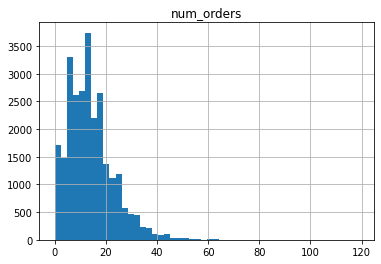

In [6]:
df_raw.hist(bins=50);

На гистограмме четко видны выбросы. Избавимся от них, применяя правило 3-х сигм(99% данных лежат в диапзоне 3-х стандартных отклонений вокруг среднего)

In [7]:
limit_min = df_raw['num_orders'].mean() - 3*df_raw['num_orders'].std()
limit_max = df_raw['num_orders'].mean() + 3*df_raw['num_orders'].std()
print(limit_min, '\n', limit_max)

-13.563525168963537 
 41.70445210133069


In [8]:
df_raw = df_raw.query(" @limit_min <= num_orders <= @limit_max ")

In [9]:
# ресемплирование 1 час
df_resample = df_raw.resample('1H').sum()
df_resample.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


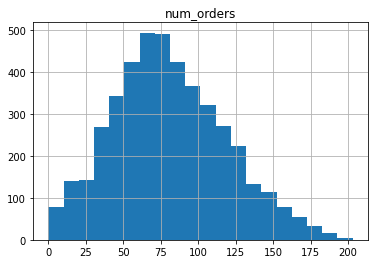

In [10]:
df_resample.hist(bins=20);

In [11]:
df_resample.index.is_monotonic

True

### Анализ сезонности и тренда

Рассмотрим график заказов

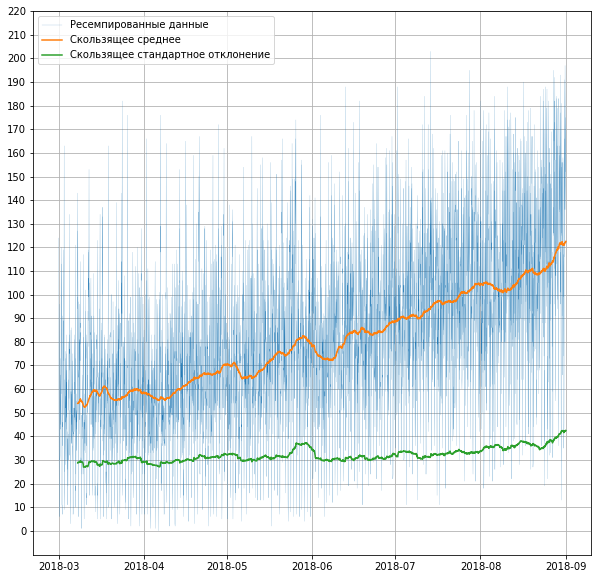

In [12]:
# неделя 168 часов
n=168

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(df_resample, linewidth=0.15, label='Ресемпированные данные')
ax.plot(df_resample.rolling(n).mean(), label='Скользящее среднее')
ax.plot(df_resample.rolling(n).std(), label='Скользящее стандартное отклонение')

ax.set_yticks(
    np.arange(0,df_resample['num_orders'].max()+20, 10)
)

ax.grid(True)
ax.legend()
plt.show()

На графике виден четкий тренд повышения количества заказов. Чем ближе к сентябрю, тем выше количество заказов.  
Рассмотрим тренды и сезонность с помощью библиотеки statsmodels.

In [13]:
decomposed = seasonal_decompose(df_resample)

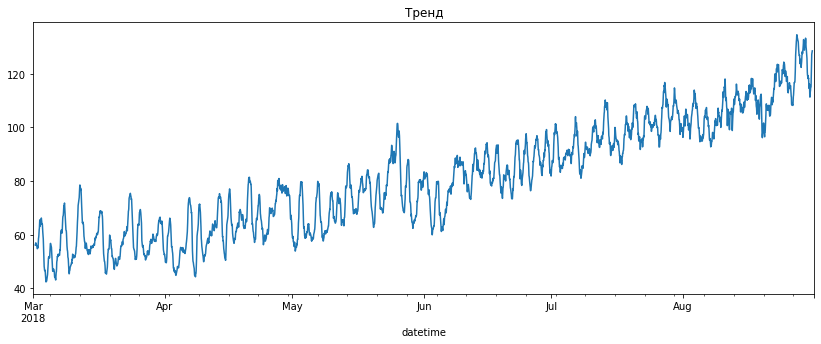

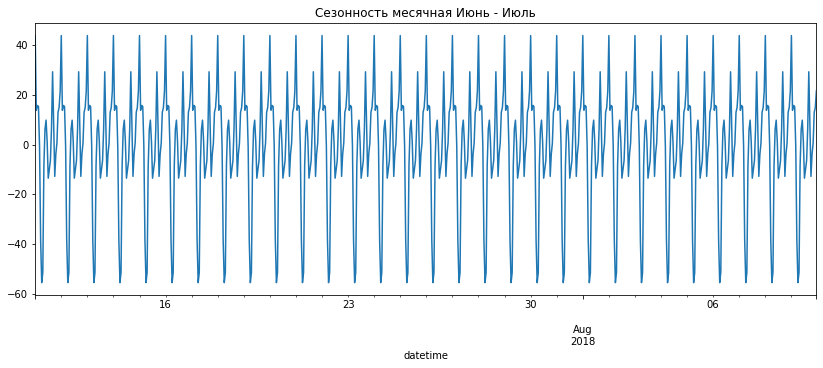

In [14]:
plt.figure(figsize=(14,5))
decomposed.trend.plot()
plt.title('Тренд')

plt.figure(figsize=(14,5))
# июнь 11 Пн -июль 9 Пн. ОДин месяц
decomposed.seasonal['2018-07-11':'2018-08-09'].plot()
plt.title('Сезонность месячная Июнь - Июль');

Прослеживается сезонность. Расммотрим более короткий промежуток

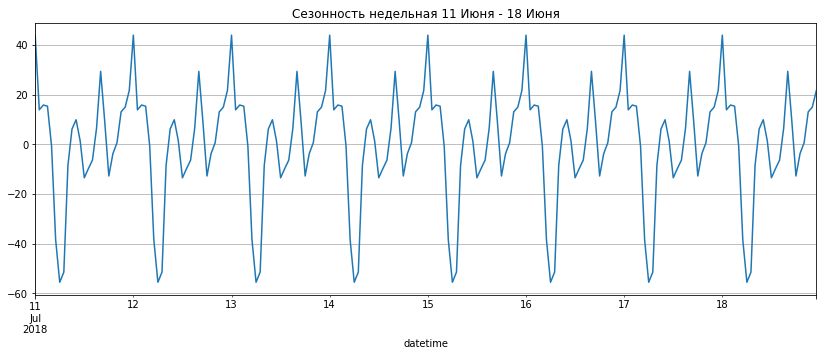

In [15]:
# июнь 11 Пн -июль 18
plt.figure(figsize=(14,5))
decomposed.seasonal['2018-07-11':'2018-07-18'].plot(ax=plt.gca(), grid=True)
plt.title('Сезонность недельная 11 Июня - 18 Июня')
plt.show()

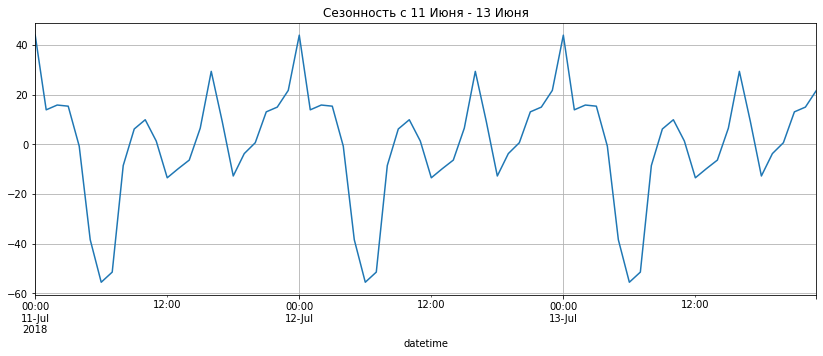

In [16]:
plt.figure(figsize=(14,5))
decomposed.seasonal['2018-07-11':'2018-07-13'].plot(grid=True)
plt.title('Сезонность с 11 Июня - 13 Июня')
plt.show()

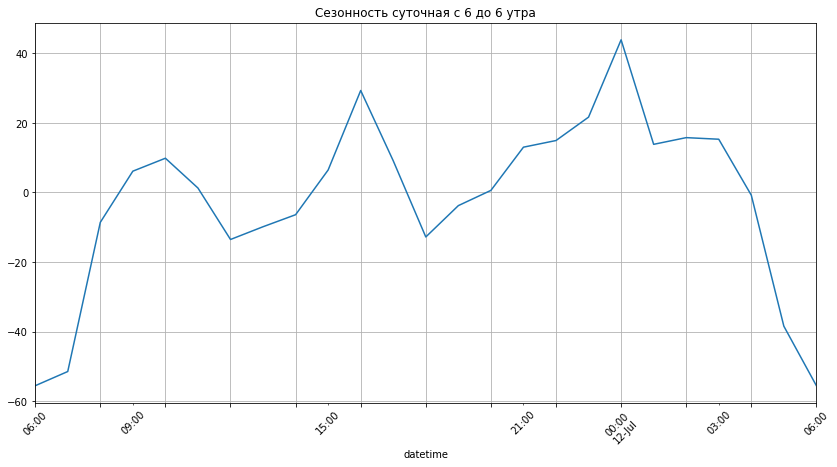

In [17]:
# сезонность за сутки с 6 до 6 утра
plt.figure(figsize=(14, 7))
decomposed.seasonal['2018-07-11 06':'2018-07-12 06'].plot(
    grid=True,
    xticks=pd.date_range(start='2018-07-11 06', end='2018-07-12 06', freq='2H'),
    rot=45
)
plt.title('Сезонность суточная с 6 до 6 утра')
plt.show()

Как мы можем наблюдать, у нас внутрисуточная сезонность. Больше всего заказов ночью. Имеются всплески в 16:00 и полночь.  
Рассмотрим сезонность на разных месяцах.

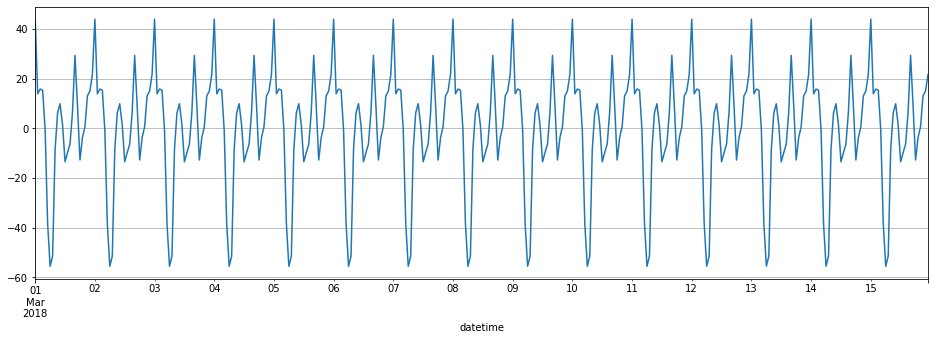

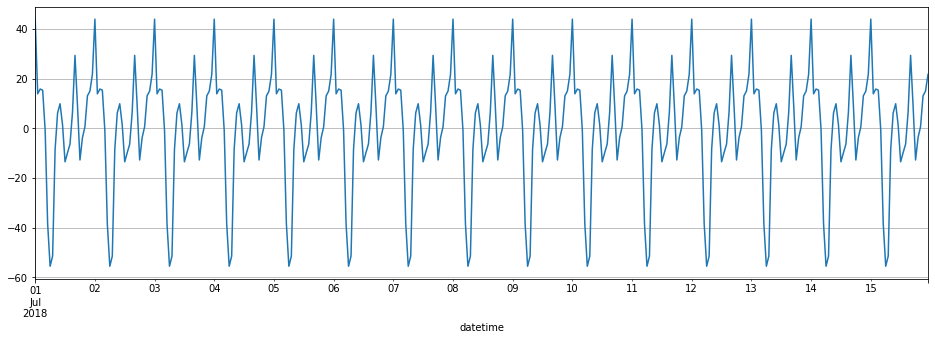

In [18]:
plt.figure(figsize=(16,5))
decomposed.seasonal['2018-03-01':'2018-03-15'].plot(grid=True)
plt.show();


plt.figure(figsize=(16,5))
decomposed.seasonal['2018-07-01':'2018-07-15'].plot(grid=True)
plt.show();

Сезонность идентична

### Вывод
Анализ данных проведен

## Обучение

Обучение моделей будем проводить подбором параметров на кроссвалидации временных рядов. 

In [19]:
df_metric=pd.DataFrame(columns=['RMSE'], index=['LinearRegression'])
df_metric

,RMSE
LinearRegression,NaN


### Блок функций

In [20]:
state = 20220517

#### make_scorer
make scorer для  cross_val_score

In [21]:
# для make scorer в кросс-валидации
def rmse(y_true, y_pred):
    error = (y_true - y_pred) ** 2
    return np.sqrt(np.mean(error))

rmse_scorer = make_scorer(
    rmse,
    greater_is_better=False
)

#### rmse, r2_score
метрики rmse, r2

In [22]:
# получить RMSE
def get_rmse(model, X_test, y_test):
    predict = model.predict(X_test)
    return MSE(y_test, predict, squared=False)

# получить r2_score
def get_r2(model, X_test, y_test):
    predict = model.predict(X_test)
    return R2(y_test, predict)

#### make_feat
создание дополнительных признаков

In [23]:
# создание дополнительных признаков в DataFrame
def make_feat(df:pd.DataFrame, max_lag:int, rolling_mean_size:int):
#     даты
#     df['year'] = df.index.year
    # df['month'] = df.index.month
    # df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    df['hour'] = df.index.hour
    if max_lag==0 or rolling_mean_size==0:
        return
#         отстающие значения
    for lag in np.arange(1, max_lag+1, 1):
        df[f"lag_{lag}"] = df['num_orders'].shift(lag)
        
    df['rolling_mean'] = df['num_orders'].shift().rolling(rolling_mean_size).mean()

#### get_fit_sample
получить обучающие и тестовые выборки на основе данных полученных после работы make_feat

In [24]:
# разбивка на выборки для моделей
def get_fit_sample(df):
    train, test = train_test_split(df, shuffle=False, test_size=0.1, random_state=state)
    train = train.dropna()

    X_train = train.drop(['num_orders'], axis=1)
    y_train = train['num_orders']

    X_test = test.drop(['num_orders'], axis=1)
    y_test = test['num_orders']
    return X_train, y_train, X_test, y_test

#### time_cross_val
кросс-валидация для временных рядов

In [25]:
def time_cross_val(model, X, y, split=5):
    tscv = TimeSeriesSplit(n_splits = split)
    rmse = []
    for train_index, test_index in tscv.split(X):

#         print("TRAIN:", train_index.min(), train_index.max(), "TEST:", test_index.min(), test_index.max())
#         print("=========================================")

        X_train1, X_test1 = X.iloc[train_index.min():train_index.max()], X.iloc[test_index.min():test_index.max()]
        y_train1, y_test1 = y.iloc[train_index.min():train_index.max()], y.iloc[test_index.min():test_index.max()]

        model.fit(X_train1, y_train1)
        r = get_rmse(model, X_test1, y_test1)
        rmse.append(r)

    return np.mean(rmse)

#### get_good_param V2
получаем лучшие параметры кол-ва признаков, путем перебора параметров и обучения модели на полученных выборках

In [26]:
# получить лучшие параметры DataFrame, путем добавления признаков
def get_good_param(
    data:pd.DataFrame,
    min_lag:int,
    max_lag:int,
    rmean_min:int,
    rolling_mean_size:int,
    step:int,
    model):
    
    df = data.copy()
    best_cvs=48
    best_max_lag=0
    best_rolling_mean_size=0
    
    for lag in tqdm_notebook(np.arange(min_lag, max_lag+1, step)):
        for rolling_mean in tqdm_notebook(np.arange(rmean_min, rolling_mean_size+1, step), leave=False):
            
            make_feat(df, lag, rolling_mean)
            
            X_train, y_train, X_test, y_test = get_fit_sample(df)

            model.fit(X_train, y_train)

#             кросс-валидация
            cvs = time_cross_val(model, X_train, y_train)
#             кросс-валидация
           
            if cvs < best_cvs:#чем меньше результат, тем лучше
                best_cvs = cvs
                best_max_lag = lag
                best_rolling_mean_size = rolling_mean
            
            df = data.copy()
    return {'best_cvs':best_cvs, 'best_max_lag':best_max_lag, 'best_rolling_mean_size':best_rolling_mean_size}

#### draw_error
строим график ошибок

In [102]:
def draw_error(model,
               X,
               y,
               date_start='2018-08-15',
               date_end='2018-08-17',
               title='None'
    ):
    predict = model.predict(X)
    
    df = pd.DataFrame(columns=['Заказы', 'Предсказание'], index=X.index)
    df['Предсказание'] = predict
    df['Заказы'] = y
    
    df['Разница'] = np.abs(
    df['Предсказание'] - df['Заказы']
)
    
    plt.figure()
    ax=df.plot(
        figsize=(10,5),
        grid=True,
        xticks = pd.date_range(start=date_start, end=date_end,
#                                inclusive="both",
                               freq='4H'),
        yticks=np.arange(0, 210, 10),
        ylim=(0, 200),
        xlim=(date_start,date_end),

    );
    ax.set_xlabel('Дата и время')
    ax.set_ylabel('Число заказов')
    ax.set_title(f'График ошибок {title}')
    plt.show();

### Линейная регрессия

Подберем параметры признаков для линейной регрессии.

In [96]:
model_LR = LinearRegression(n_jobs=-1)
df_temp = df_resample.copy()
a = get_good_param(df_temp, 119, 123, 124, 128, 1, model_LR)
print(a)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

{'best_cvs': 21.96429188799054, 'best_max_lag': 121, 'best_rolling_mean_size': 126}


Подготовим выборки, используя полученные параметры отстающих значений и скользящего среднего

In [97]:
df = df_resample.copy()
make_feat(df, 121, 126)
X_train, y_train, X_test, y_test = get_fit_sample(df)

Обучим модель и сделаем прдесказание на тестовой выборке

In [98]:
model_LR.fit(X_train, y_train)
rmse_LR = get_rmse(model_LR, X_test, y_test)
r2_LR = get_r2(model_LR, X_test, y_test)

Занесем результат в таблицу

In [99]:
df_metric.loc['LinearRegression', 'RMSE'] = rmse_LR
df_metric.loc['LinearRegression', 'R2_score'] = r2_LR
df_metric

,RMSE,R2_score
LinearRegression,28.828039,0.454447
DecisionTreeRegressor,38.446817,0.029652
RandomForestRegressor,34.303182,0.227541


In [100]:
X = X_test.copy()
y = y_test.copy()

### Решающее дерево

Подберем параметры признаков для решеающего дерева.

In [54]:
model_DT = DecisionTreeRegressor(random_state=state)
df_temp = df_resample.copy()
a = get_good_param(df_temp, 42, 44, 11, 13, 1, model_DT)
print(a)

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

{'best_cvs': 33.13571512103555, 'best_max_lag': 43, 'best_rolling_mean_size': 12}


Подготовим выборки, используя полученные параметры отстающих значений и скользящего среднего

In [55]:
df = df_resample.copy()
make_feat(df, 43, 12)
X_train, y_train, X_test, y_test = get_fit_sample(df)

На основе полученных выборок, подберем параметры для решающего дерева через кросс-валидацию

In [57]:
best_depth = 0
best_score = 48

for depth in tqdm_notebook(np.arange(8, 11, 1)):
    
    model = DecisionTreeRegressor(random_state=state, max_depth = depth)
    model.fit(X_train, y_train)
    score = get_rmse(model, X_test, y_test)
    
    if score < best_score:
        best_score = score
        model_DT = model
        best_depth = depth
#     print(f"depth = {depth}, RMSE = {score}, {best_score}")
print(f"max_depth = {best_depth}, RMSE = {best_score}")
    

  0%|          | 0/3 [00:00<?, ?it/s]

max_depth = 9, RMSE = 38.6445430425017


На основе полученных геперпараметров, снова подберем параметры признаков для решеающего дерева

In [58]:
# model_DT = DecisionTreeRegressor(max_depth=4, random_state=state)
df_temp = df_resample.copy()
a = get_good_param(df_temp, 1, 4, 70, 80, 1, model_DT)
print(a)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

{'best_cvs': 26.32952175971126, 'best_max_lag': 1, 'best_rolling_mean_size': 78}


In [60]:
df = df_resample.copy()
make_feat(df, 1, 78)
X_train, y_train, X_test, y_test = get_fit_sample(df)

Обучим модель и сделаем прдесказание на тестовой выборке

In [61]:
model_DT.fit(X_train, y_train)
rmse_DT = get_rmse(model_DT, X_test, y_test)
r2_DT = get_r2(model_DT, X_test, y_test)

In [62]:
df_metric.loc['DecisionTreeRegressor', 'RMSE'] = rmse_DT
df_metric.loc['DecisionTreeRegressor', 'R2_score'] = r2_DT
df_metric

,RMSE,R2_score
LinearRegression,28.828039,0.454447
DecisionTreeRegressor,38.446817,0.029652


### Случайный лес

In [66]:
model_RF = RandomForestRegressor(random_state=state)
df_temp = df_resample.copy()
a = get_good_param(df_temp, 11, 14, 12, 15, 1, model_RF)
print(a)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

{'best_cvs': 23.296369442890526, 'best_max_lag': 12, 'best_rolling_mean_size': 13}


In [67]:
df = df_resample.copy()
make_feat(df, 12, 13)
X_train, y_train, X_test, y_test = get_fit_sample(df)

In [86]:
params = {
    'max_depth': np.arange(21, 22, 1),
    'n_estimators': np.arange(110, 111, 1),
    # 'learning_rate': [0.001, 0.01, 0.1, 0.5, 1]
}

my_cv = TimeSeriesSplit(n_splits=4).split(X_train)

GridSCV = GridSearchCV(
    model_RF,
    params,
    scoring=rmse_scorer,
    n_jobs=-1,
    verbose=1,
    cv=my_cv
)


GridSCV.fit(X_train, y_train)
GridSCV.best_params_

Fitting 4 folds for each of 5 candidates, totalling 20 fits


{'max_depth': 21, 'n_estimators': 110}

In [91]:
model_RF = RandomForestRegressor(max_depth=21, n_estimators=110, random_state=state)
df_temp = df_resample.copy()
a = get_good_param(df_temp, 1, 2, 25, 25, 1, model_RF)
print(a)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

{'best_cvs': 23.24797121692873, 'best_max_lag': 2, 'best_rolling_mean_size': 25}


In [92]:
df = df_resample.copy()
make_feat(df, 2, 25)
X_train, y_train, X_test, y_test = get_fit_sample(df)

In [93]:
model_RF.fit(X_train, y_train)
rmse_RF = get_rmse(model_RF, X_test, y_test)
r2_RF = get_r2(model_RF, X_test, y_test)

In [94]:
df_metric.loc['RandomForestRegressor', 'RMSE'] = rmse_RF
df_metric.loc['RandomForestRegressor', 'R2_score'] = r2_RF
df_metric

,RMSE,R2_score
LinearRegression,28.828039,0.454447
DecisionTreeRegressor,38.446817,0.029652
RandomForestRegressor,34.303182,0.227541


### Вывод:
Модели обучены. Под каждую модель подобраны параметры для отстающих значений и скользящего среднего.

## ИТОГ

In [95]:
df_metric

,RMSE,R2_score
LinearRegression,28.828039,0.454447
DecisionTreeRegressor,38.446817,0.029652
RandomForestRegressor,34.303182,0.227541


Оптимальной моделью в данной задаче является модель линейной регрессии. Под модель были подобраны оптимальные признаки, на которых мы обучили модель.  
Рассмотрим график предсказаний нашей модели.

<Figure size 432x288 with 0 Axes>

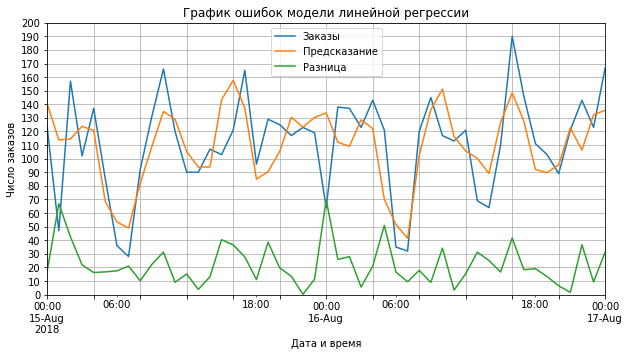

In [104]:
draw_error(model_LR, X, y, title='модели линейной регрессии')

Видно, что пики расхождений графиков заказов и предсказаний модели, приходятся на моменты, в которых линия графика заказов заметно уходит в пике или ввысь. Можно говорить о том, что модель плохо предсказывает "выбивающиеся" значения.